In [1]:
from utils.utils import gait_dataloader
from utils.utils import init_model
from sklearn.metrics import accuracy_score
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

In [2]:
class Dataset_torch(Dataset):

    def __init__(self, data):
        self.data_x, self.data_y = data
    def __len__(self):
        return len(self.data_y)

    def __getitem__(self, idx):
        return self.data_x[idx], self.data_y[idx]


# Data set TDvsPC_new

In [3]:
dataset = "TDvsPC_new"

x_train, y_train ,x_val, y_val, x_test, y_test, nb_classes = gait_dataloader(data_type='numpy',dataset=dataset,flatten = False)

In [14]:
# classifer = init_model(model_name='InceptionTime')
# classifer.fit(x_train, y_train, x_test, y_test, batch_size=64, max_epochs=50,default_root_dir = './tmp/LRP_InceptionTime_TDvsPC_new_checkpoints')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name                 | Type              | Params
-----------------------------------------------------------
0 | model_inception_list | ModuleList        | 473 K 
1 | model_shortcut_list  | ModuleList        | 19.7 K
2 | globalavgpooling1d   | AdaptiveAvgPool1d | 0     
3 | fc                   | Linear            | 258   
4 | softmax              | Softmax           | 0     
-----------------------------------------------------------
493 K     Trainable params
0         Non-trainable params
493 K     Total params
1.976     Total estimated model params size (MB)


Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

/home/aorus-users/miniconda3/envs/env_zhengyang/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:453: UserWarning: Your `val_dataloader` has `shuffle=True`,it is strongly recommended that you turn this off for val/test/predict dataloaders.
  rank_zero_warn(


/home/aorus-users/miniconda3/envs/env_zhengyang/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:407: UserWarning: The number of training samples (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  67%|██████████████████████████████████▋                 | 32/48 [00:01<00:00, 23.08it/s, loss=0.0757, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 1:  67%|██████████████████████████████████▋                 | 32/48 [00:01<00:00, 24.65it/s, loss=0.0247, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 2:  67%|██████████████████████████████████▋                 | 32/48 [00:01<00:00, 24.14it/s, loss=0.0288, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 3:  67%|██████████████████████████████████▋                 | 32/48 [00:01<00:00, 23.24it/s, loss=0.0134, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 4:  67%|██████████████████████████████████                 | 32/48 [00:01<00:00, 24.24it/s, loss=0.00968, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 5:  67%|██████████████████████████████████                 | 32/48 [00:01<00:00, 23.18it/s, loss=0.00893, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 6:  67%|██████████████████████████████████                 | 32/48 [00:01<00:00, 2

Epoch 31:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 23.99it/s, loss=0.000356, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 32:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 23.27it/s, loss=0.000466, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 33:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 24.32it/s, loss=0.000337, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 34:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 23.58it/s, loss=0.000452, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 35:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 23.78it/s, loss=0.000375, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 36:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 24.50it/s, loss=0.000117, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 37:  67%|████████████████████████████████▋                | 32/48 [00:01<00:00, 23

In [15]:
# prediction_pre = classifer.predict(x_test,batch_size=64)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 100%|███████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 41.17it/s]


In [16]:
# accuracy_score(y_test,prediction_pre)

0.9372549019607843

In [4]:
classifer = init_model(model_name='InceptionTime').load("/mnt/Data/Zhengyang/TSC_gait_analysis/tmp/LRP_InceptionTime_TDvsPC_new_checkpoints/lightning_logs/version_1/checkpoints/epoch=49-step=1599.ckpt")

In [5]:
prediction_pre = classifer.predict(x_test,batch_size=64)
accuracy_score(y_test,prediction_pre)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Using TensorFlow backend.


Predicting: 100%|███████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 29.72it/s]


/mnt/Data/Zhengyang/TSC_gait_analysis/classifiers/InceptionTime.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


0.9372549019607843

In [6]:
# https://github.com/dmitrysarov/LRP_decomposition

relevance_list_label_zero, relevance_list_label_one, r_mean_label_zero, r_mean_label_one, d_mean_label_zero, d_mean_label_one, lim_min, lim_max = classifer.compute_LRP(x_test,y_test)

/mnt/Data/Zhengyang/TSC_gait_analysis/classifiers/InceptionTime.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor(-8.9550e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.4694e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.2216e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.8199e-19, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.7790e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.8063e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.5635e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-9.1116e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.9301e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.6480e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.2833e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.9426e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.8088e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.6379e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.6368e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.2129e-17, dtype=torch.

tensor(1.6653e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.0509e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.3073e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.4019e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.4626e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.5511e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.8611e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.2042e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0286e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.4216e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.2072e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.1344e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.5498e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.0246e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.1682e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.4700e-17, dtype=torch.floa

tensor(1.9461e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.2305e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.1589e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.9590e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.5304e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.6905e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.3562e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.2072e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.0056e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.0358e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.4031e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.5602e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.5511e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.8139e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.2347e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.8099e-17, dtype=torch.f

tensor(9.0215e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1682e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.8901e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.1759e-19, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.3544e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1724e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.7852e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.8493e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4945e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.5808e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.6480e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.7756e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.0461e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3929e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.1564e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.6571e-17, dtype=torch.

tensor(-1.1449e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.8570e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2230e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.1207e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0096e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.5326e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.1008e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.6755e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1623e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.8677e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.6096e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2148e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.9970e-19, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.2011e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.0827e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.9443e-17, dtype=torch.f

tensor(1.1102e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.7157e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.7969e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.4210e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.9532e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.6841e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.2008e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2174e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-9.8053e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.5231e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.9711e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0631e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.3425e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.7743e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.8789e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3315e-16, dtype=torch

tensor(1.1102e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.1306e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.3756e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.0449e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2241e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.2460e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.1578e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.0153e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.8228e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.7822e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.5514e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.2209e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.7786e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.5509e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.1152e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.1827e-17, dtype=torch.floa

tensor(3.1777e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.2422e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.9656e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.1279e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-9.1318e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.8266e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.5559e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.5511e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.2320e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.1366e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.8489e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.3893e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.9599e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.2330e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.0610e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.9364e-17, dtype=torch.

# Plot sliency map label zero

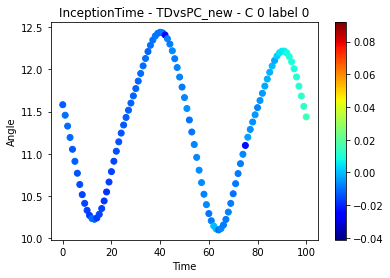

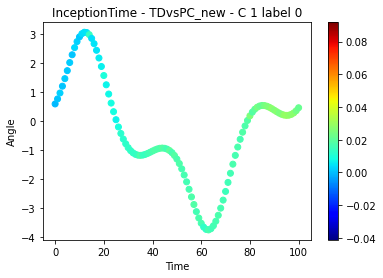

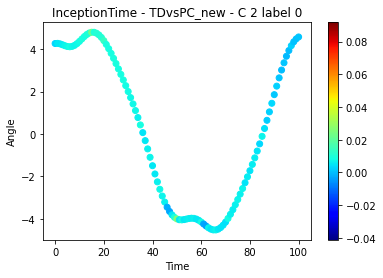

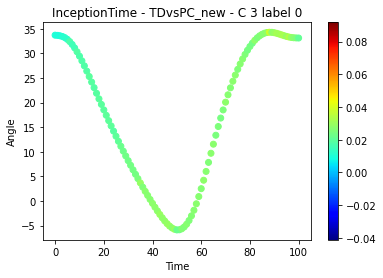

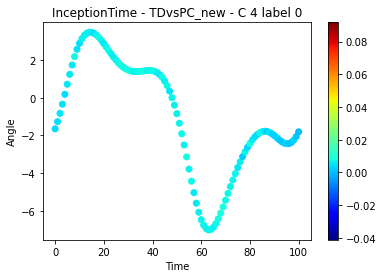

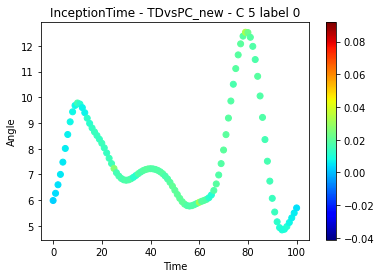

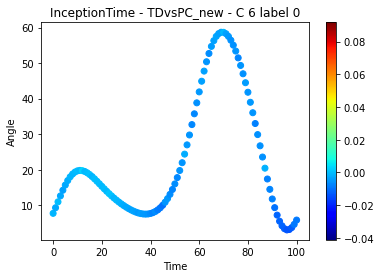

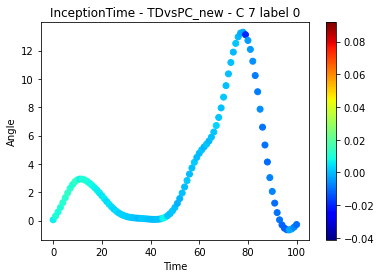

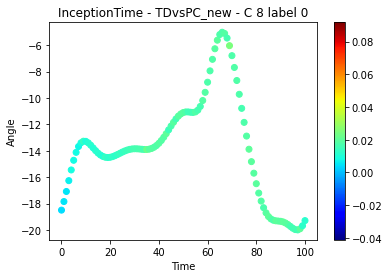

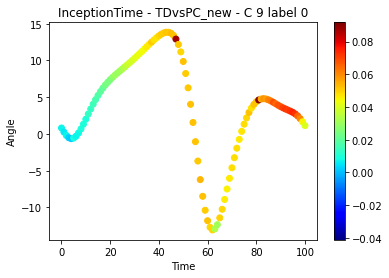

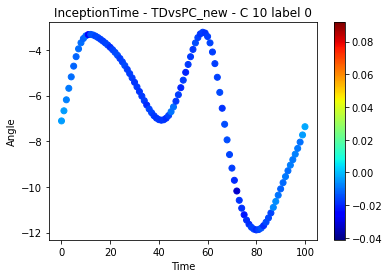

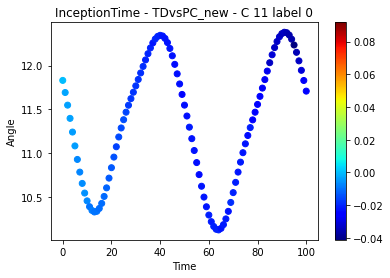

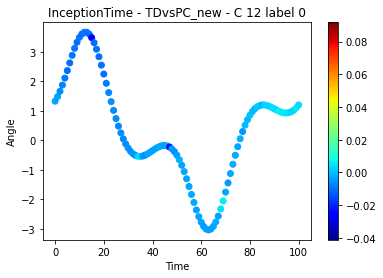

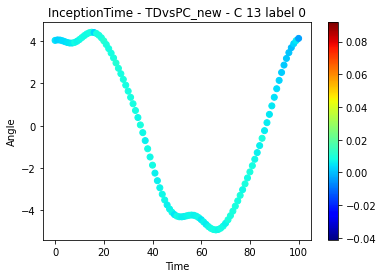

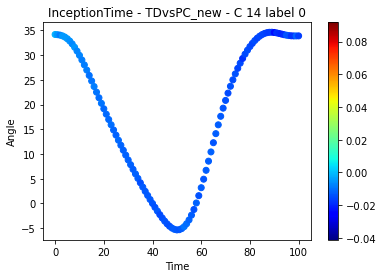

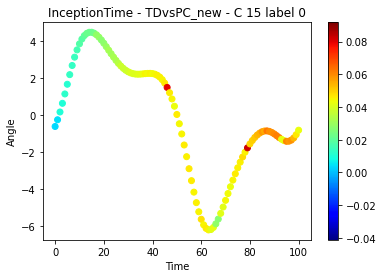

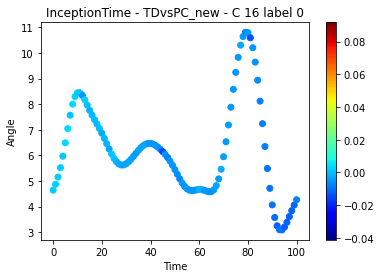

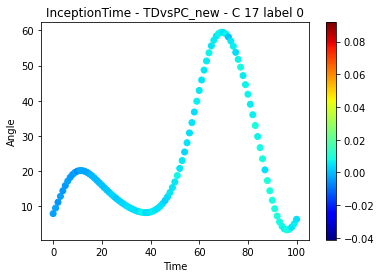

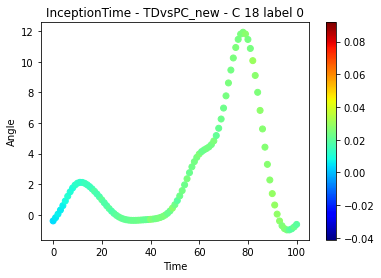

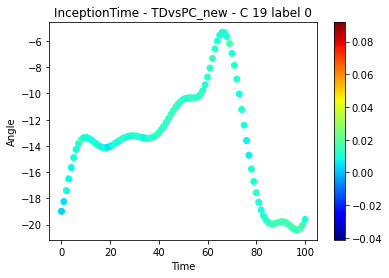

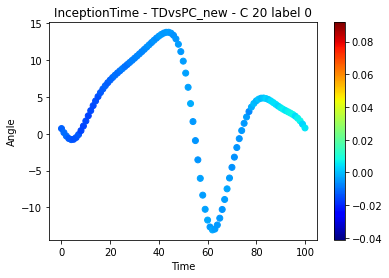

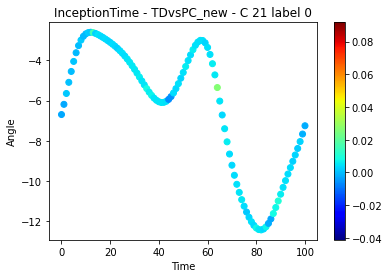

In [7]:
for i in range(22):

    plt.scatter(range(101),d_mean_label_zero[i],c=r_mean_label_zero[i],cmap='jet')
    plt.colorbar()
    
    
    plt.ylabel('Angle')
    plt.xlabel('Time')
    plt.title('InceptionTime - TDvsPC_new - C '+str(i)+' label 0')
    plt.clim(lim_min, lim_max)
#     plt.savefig('LRP_fig_LeftSide_RightSide/label_zero/Channel-range-label-zero-'+str(i))
    plt.show()

# Plot sliency map label one

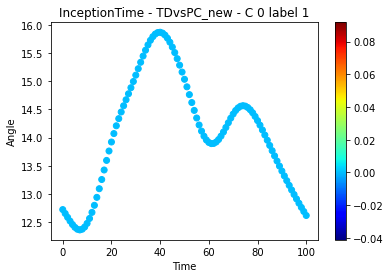

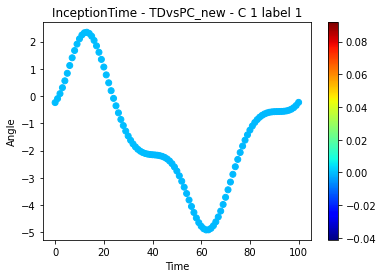

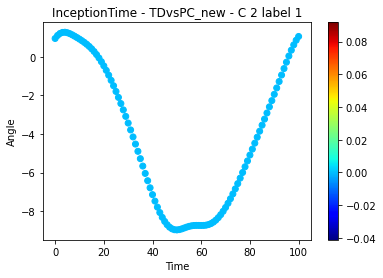

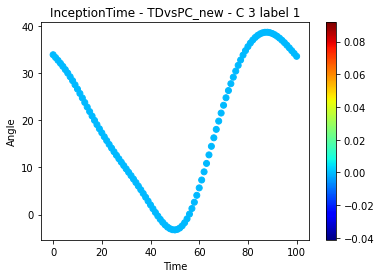

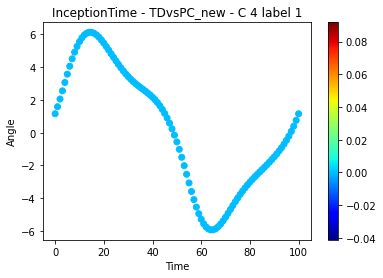

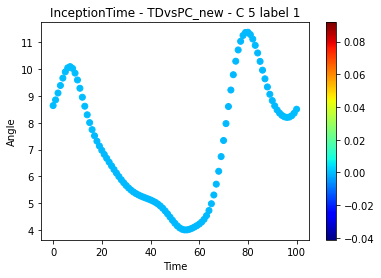

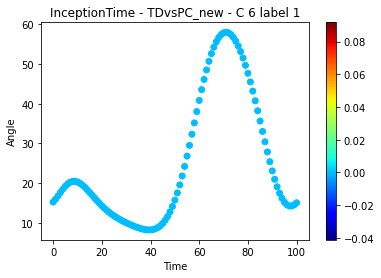

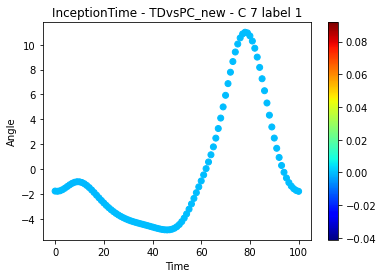

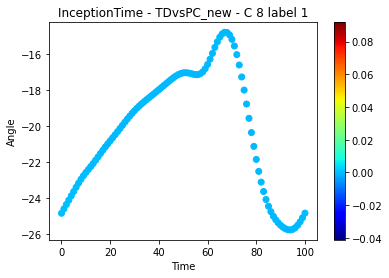

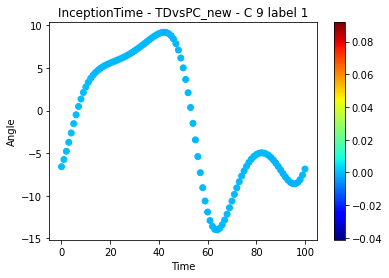

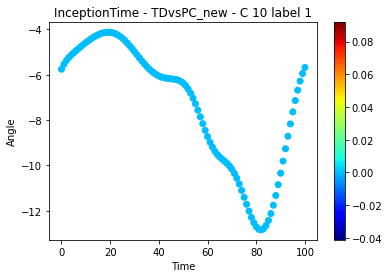

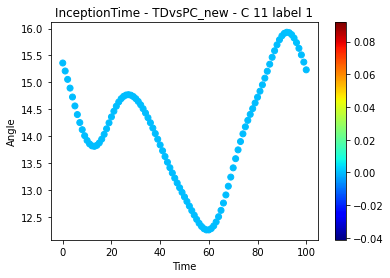

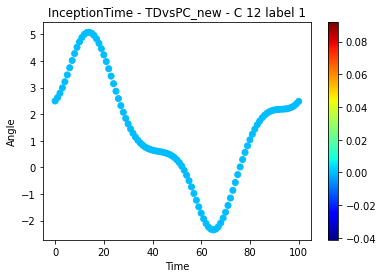

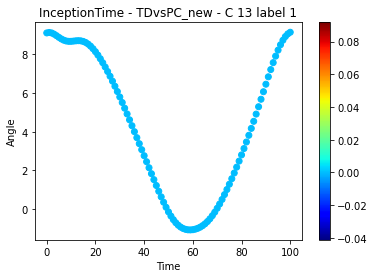

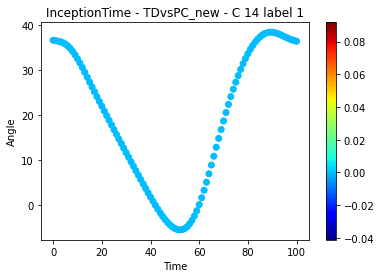

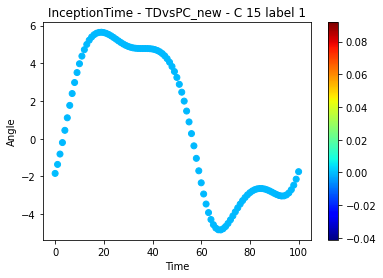

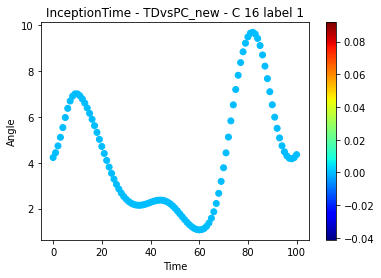

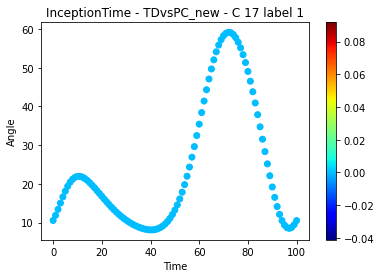

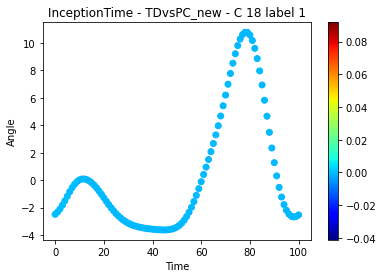

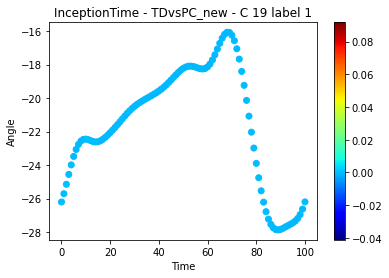

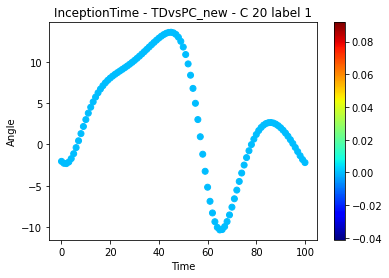

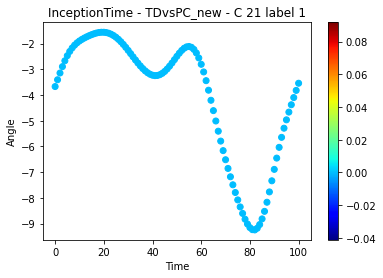

In [8]:
for i in range(22):

    plt.scatter(range(101),d_mean_label_one[i],c=r_mean_label_one[i],cmap='jet')
    plt.colorbar()
    
    
    plt.ylabel('Angle')
    plt.xlabel('Time')
    plt.title('InceptionTime - TDvsPC_new - C '+str(i)+' label 1')
    plt.clim(lim_min, lim_max)
#     plt.savefig('LRP_fig_LeftSide_RightSide/label_one/Channel-range-label-one-'+str(i))
    plt.show()

# Data set TDvsPC

In [9]:
dataset = "TDvsPC"

x_train, y_train ,x_val, y_val, x_test, y_test, nb_classes = gait_dataloader(data_type='numpy',dataset=dataset,flatten = False)

In [28]:
# classifer = init_model(model_name='InceptionTime')
# classifer.fit(x_train, y_train, x_test, y_test, batch_size=64, max_epochs=50,default_root_dir = './tmp/LRP_InceptionTime_TDvsPC_checkpoints')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name                 | Type              | Params
-----------------------------------------------------------
0 | model_inception_list | ModuleList        | 473 K 
1 | model_shortcut_list  | ModuleList        | 19.7 K
2 | globalavgpooling1d   | AdaptiveAvgPool1d | 0     
3 | fc                   | Linear            | 258   
4 | softmax              | Softmax           | 0     
-----------------------------------------------------------
493 K     Trainable params
0         Non-trainable params
493 K     Total params
1.976     Total estimated model params size (MB)


Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

/home/aorus-users/miniconda3/envs/env_zhengyang/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:453: UserWarning: Your `val_dataloader` has `shuffle=True`,it is strongly recommended that you turn this off for val/test/predict dataloaders.
  rank_zero_warn(


/home/aorus-users/miniconda3/envs/env_zhengyang/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:407: UserWarning: The number of training samples (29) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  66%|██████████████████████████████████▎                 | 29/44 [00:01<00:00, 21.92it/s, loss=0.0708, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 1:  66%|██████████████████████████████████▎                 | 29/44 [00:01<00:00, 23.80it/s, loss=0.0323, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 2:  66%|██████████████████████████████████▎                 | 29/44 [00:01<00:00, 24.31it/s, loss=0.0267, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 3:  66%|██████████████████████████████████▎                 | 29/44 [00:01<00:00, 23.32it/s, loss=0.0143, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 4:  66%|█████████████████████████████████▌                 | 29/44 [00:01<00:00, 24.02it/s, loss=0.00921, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 5:  66%|██████████████████████████████████▉                  | 29/44 [00:01<00:00, 23.81it/s, loss=0.013, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 6:  66%|██████████████████████████████████▎                 | 29/44 [00:01<00:00, 

Epoch 31:  66%|████████████████████████████████▉                 | 29/44 [00:01<00:00, 23.37it/s, loss=0.00016, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 32:  66%|████████████████████████████████▎                | 29/44 [00:01<00:00, 23.38it/s, loss=0.000174, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 33:  66%|████████████████████████████████▎                | 29/44 [00:01<00:00, 23.75it/s, loss=8.03e-05, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 34:  66%|████████████████████████████████▉                 | 29/44 [00:01<00:00, 23.11it/s, loss=6.9e-05, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 35:  66%|████████████████████████████████▎                | 29/44 [00:01<00:00, 24.25it/s, loss=0.000136, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 36:  66%|████████████████████████████████▎                | 29/44 [00:01<00:00, 23.34it/s, loss=0.000116, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 37:  66%|████████████████████████████████▎                | 29/44 [00:01<00:00, 22

In [31]:
# prediction_pre = classifer.predict(x_test,batch_size=64)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 100%|███████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 39.29it/s]


/mnt/Data/Zhengyang/TSC_gait_analysis/classifiers/InceptionTime.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


In [32]:
# accuracy_score(y_test,prediction_pre)

0.9451754385964912

In [10]:
classifer = init_model(model_name='InceptionTime').load("/mnt/Data/Zhengyang/TSC_gait_analysis/tmp/LRP_InceptionTime_TDvsPC_checkpoints/lightning_logs/version_0/checkpoints/epoch=49-step=1449.ckpt")

prediction_pre = classifer.predict(x_test,batch_size=64)
accuracy_score(y_test,prediction_pre)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 100%|███████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 47.82it/s]


0.9451754385964912

In [11]:
# https://github.com/dmitrysarov/LRP_decomposition

relevance_list_label_zero, relevance_list_label_one, r_mean_label_zero, r_mean_label_one, d_mean_label_zero, d_mean_label_one, lim_min, lim_max = classifer.compute_LRP(x_test,y_test)

/mnt/Data/Zhengyang/TSC_gait_analysis/classifiers/InceptionTime.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor(2.7135e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.7716e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.6688e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.7347e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.1966e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3824e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.1417e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.6006e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4413e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.2284e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.2099e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.8229e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0., dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.3368e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.7513e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.1173e-16, dtype=torch.float64, g

tensor(4.2718e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.1581e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.3243e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.7347e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.9611e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.0711e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.5014e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4246e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.7437e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.3584e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.7851e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2063e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.3873e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.5285e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.1560e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.5311e-17, dtype=torch.f

tensor(3.0160e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.1741e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.2531e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1746e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.4886e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.6468e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.3355e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.1287e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.8191e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.8564e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0534e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.0835e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.2356e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.1250e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.7331e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.9425e-17, dtype=torch.flo

tensor(1.3296e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3708e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.9093e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2487e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3018e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.4591e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.1174e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.2786e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.7366e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.0781e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1926e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4523e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.4338e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.8220e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.9552e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.6670e-17, dtype=torch.

tensor(5.9212e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.5153e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.4477e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.0090e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.8340e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.0263e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.8467e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.3792e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.1920e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.0989e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.0965e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.0432e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.7756e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.9158e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.3521e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.9389e-18, dtype=torch.floa

tensor(1.2149e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.5535e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.6016e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.3102e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.3042e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.9719e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.6659e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.8735e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.2344e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.2506e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.3905e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.4568e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.8996e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.5210e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.4475e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(9.5979e-17, dtype=torch.flo

tensor(-2.1525e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.0755e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.3368e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.9796e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4352e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.6511e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.2069e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.1102e-16, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.4527e-18, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.6323e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.6893e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.4286e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.5401e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4328e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3363e-17, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.6287e-17, dtype=torch.flo

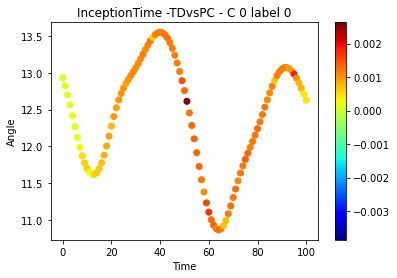

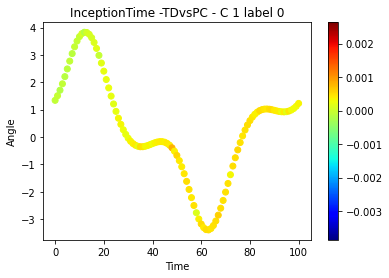

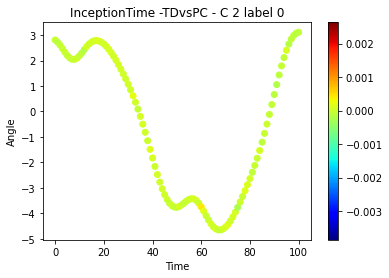

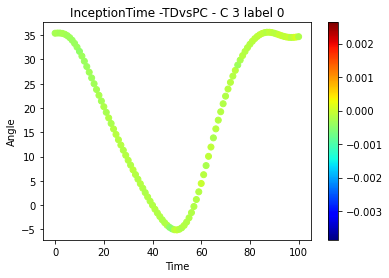

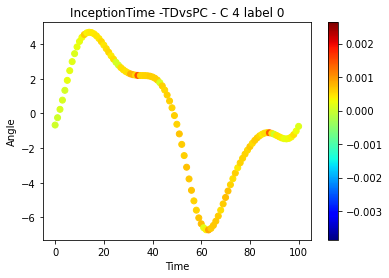

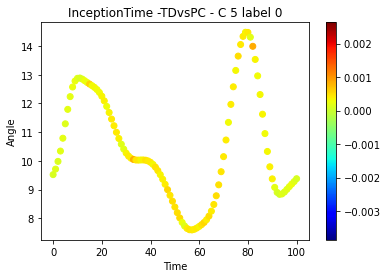

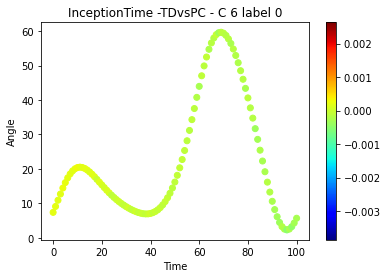

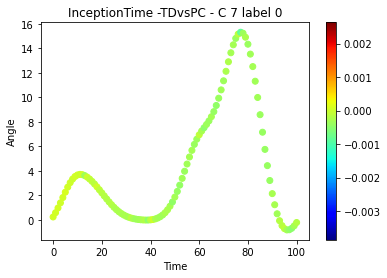

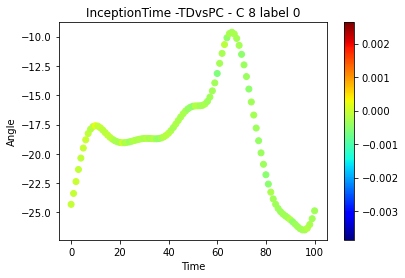

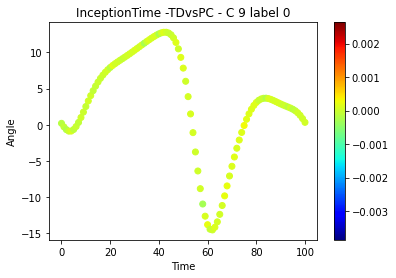

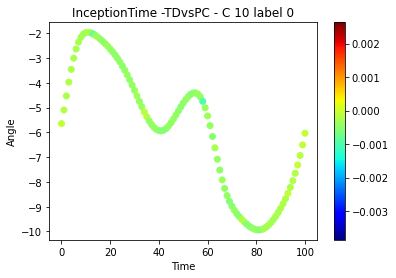

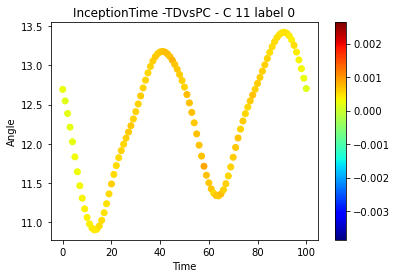

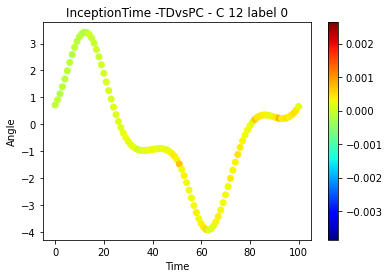

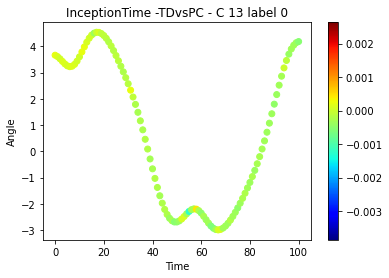

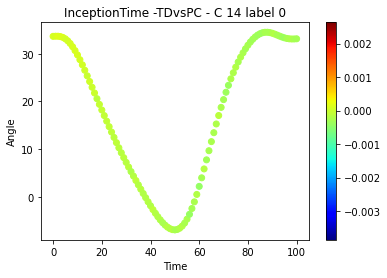

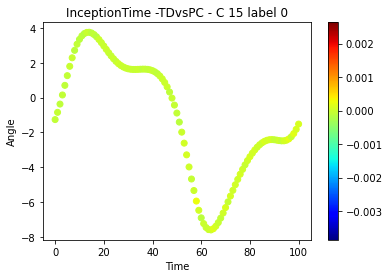

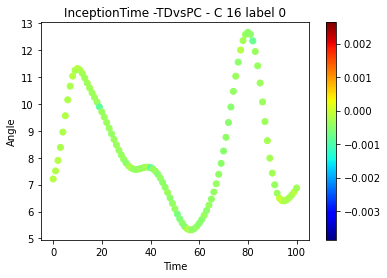

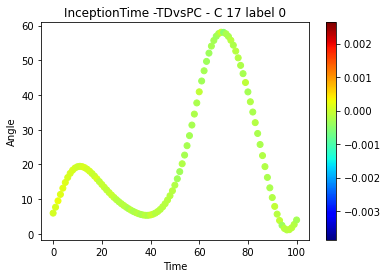

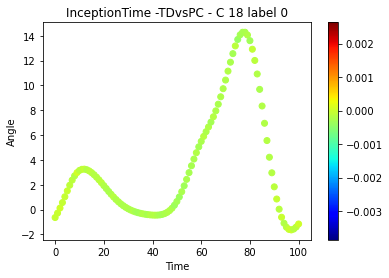

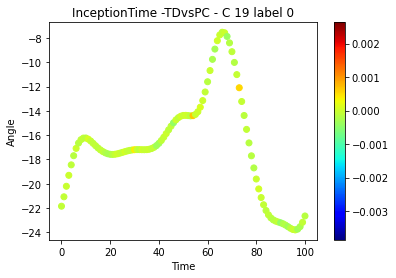

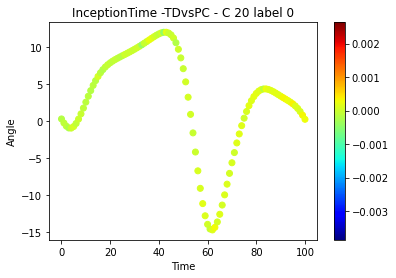

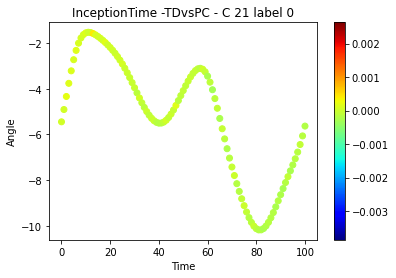

In [12]:
for i in range(22):

    plt.scatter(range(101),d_mean_label_zero[i],c=r_mean_label_zero[i],cmap='jet')
    plt.colorbar()
    
    
    plt.ylabel('Angle')
    plt.xlabel('Time')
    plt.title('InceptionTime -TDvsPC - C '+str(i)+' label 0')
    plt.clim(lim_min, lim_max)
#     plt.savefig('LRP_fig_LeftSide_RightSide/label_zero/Channel-range-label-zero-'+str(i))
    plt.show()

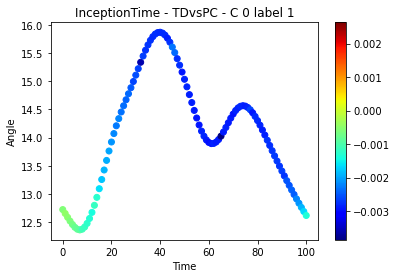

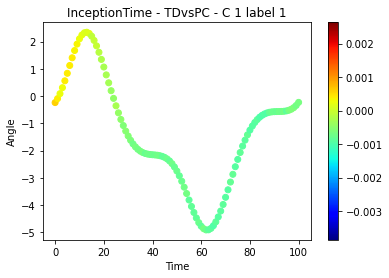

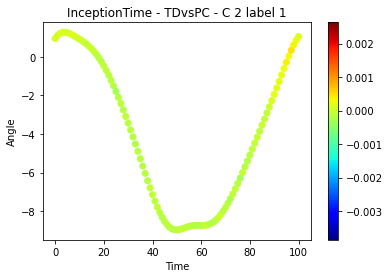

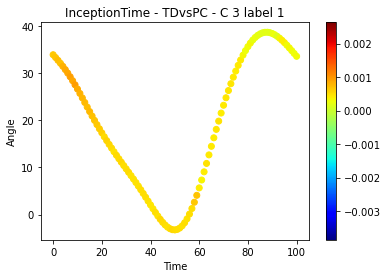

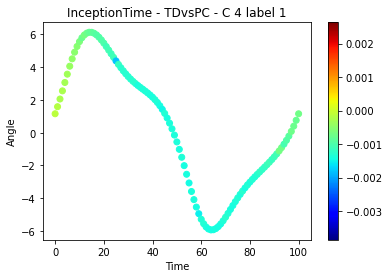

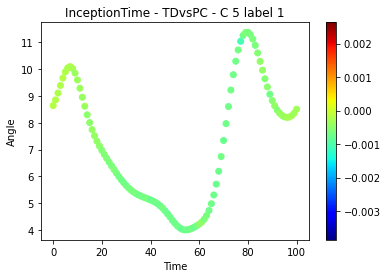

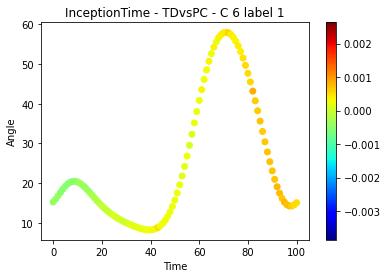

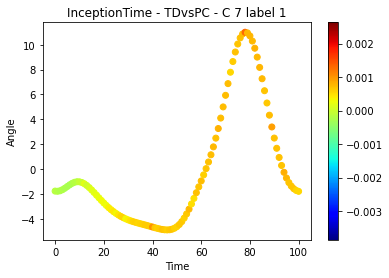

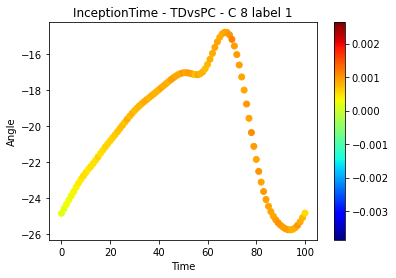

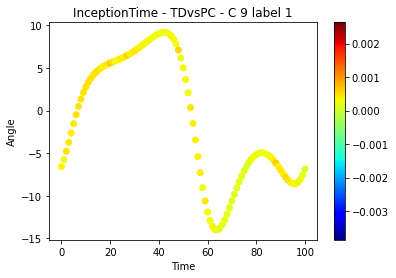

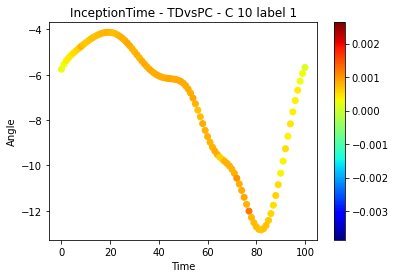

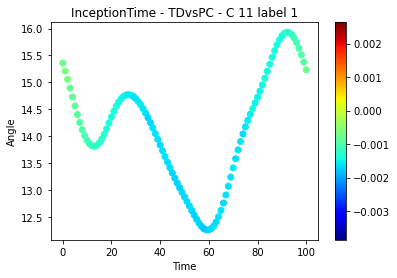

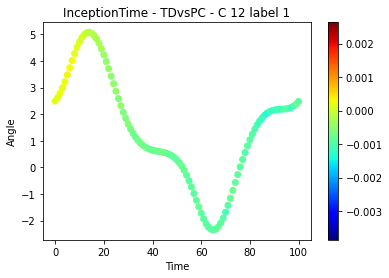

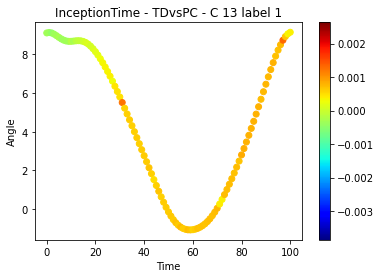

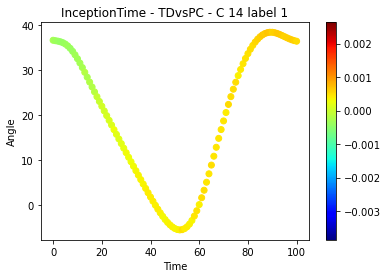

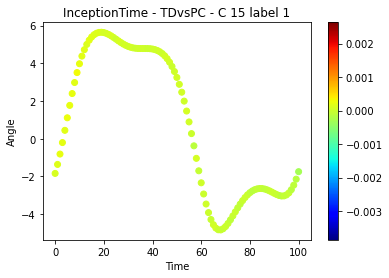

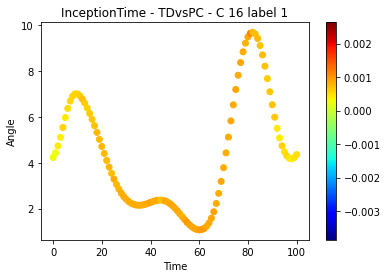

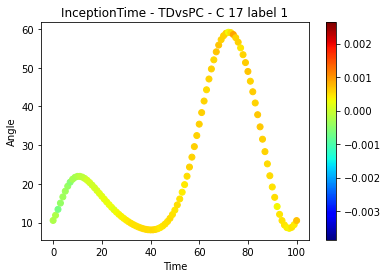

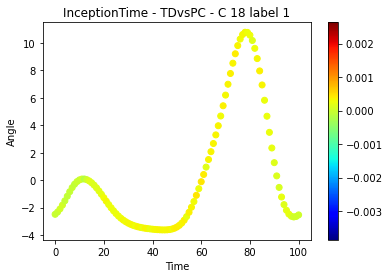

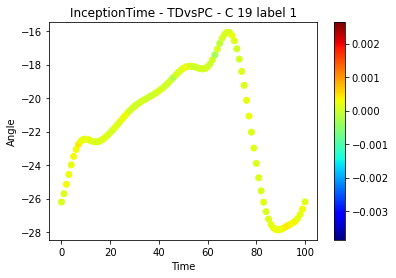

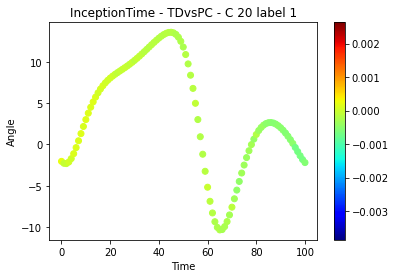

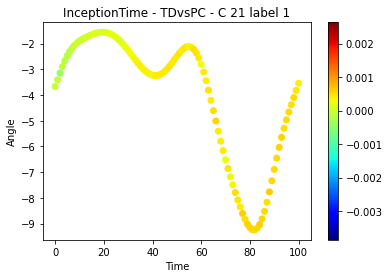

In [13]:
for i in range(22):

    plt.scatter(range(101),d_mean_label_one[i],c=r_mean_label_one[i],cmap='jet')
    plt.colorbar()
    
    
    plt.ylabel('Angle')
    plt.xlabel('Time')
    plt.title('InceptionTime - TDvsPC - C '+str(i)+' label 1')
    plt.clim(lim_min, lim_max)
#     plt.savefig('LRP_fig_LeftSide_RightSide/label_one/Channel-range-label-one-'+str(i))
    plt.show()

# Data set LeftSide_RightSide

In [14]:
dataset = "LeftSide_RightSide"

x_train, y_train ,x_val, y_val, x_test, y_test, nb_classes = gait_dataloader(data_type='numpy',dataset=dataset,flatten = False)

In [55]:
# classifer = init_model(model_name='InceptionTime')
# classifer.fit(x_train, y_train, x_test, y_test, batch_size=64, max_epochs=50,default_root_dir = './tmp/LRP_InceptionTime_LeftSide_RightSide_checkpoints')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name                 | Type              | Params
-----------------------------------------------------------
0 | model_inception_list | ModuleList        | 473 K 
1 | model_shortcut_list  | ModuleList        | 19.7 K
2 | globalavgpooling1d   | AdaptiveAvgPool1d | 0     
3 | fc                   | Linear            | 258   
4 | softmax              | Softmax           | 0     
-----------------------------------------------------------
493 K     Trainable params
0         Non-trainable params
493 K     Total params
1.976     Total estimated model params size (MB)


Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

/home/aorus-users/miniconda3/envs/env_zhengyang/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:453: UserWarning: Your `val_dataloader` has `shuffle=True`,it is strongly recommended that you turn this off for val/test/predict dataloaders.
  rank_zero_warn(


/home/aorus-users/miniconda3/envs/env_zhengyang/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:407: UserWarning: The number of training samples (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  67%|███████████████████████████████████▎                 | 26/39 [00:01<00:00, 21.67it/s, loss=0.137, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 1:  67%|██████████████████████████████████▋                 | 26/39 [00:01<00:00, 23.00it/s, loss=0.0565, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 2:  67%|██████████████████████████████████▋                 | 26/39 [00:01<00:00, 23.11it/s, loss=0.0376, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 3:  67%|██████████████████████████████████▋                 | 26/39 [00:01<00:00, 22.18it/s, loss=0.0276, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 4:  67%|██████████████████████████████████▋                 | 26/39 [00:01<00:00, 22.86it/s, loss=0.0193, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 5:  67%|██████████████████████████████████▋                 | 26/39 [00:01<00:00, 22.33it/s, loss=0.0251, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 6:  67%|██████████████████████████████████▋                 | 26/39 [00:01<00:00, 

Epoch 31:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 22.10it/s, loss=9.71e-05, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 32:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 22.93it/s, loss=6.77e-05, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 33:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 21.84it/s, loss=8.92e-05, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 34:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 23.15it/s, loss=7.49e-05, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 35:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 22.86it/s, loss=8.35e-05, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 36:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 22.54it/s, loss=0.000183, v_num=2]
Validating: 0it [00:00, ?it/s]
Epoch 37:  67%|████████████████████████████████▋                | 26/39 [00:01<00:00, 22

In [16]:
# prediction_pre = classifer.predict(x_test,batch_size=64)

In [ ]:
# accuracy_score(y_test,prediction_pre)

In [17]:
classifer = init_model(model_name='InceptionTime').load("/mnt/Data/Zhengyang/TSC_gait_analysis/tmp/LRP_InceptionTime_LeftSide_RightSide_checkpoints/lightning_logs/version_2/checkpoints/epoch=49-step=1299.ckpt")

prediction_pre = classifer.predict(x_test,batch_size=64)
accuracy_score(y_test,prediction_pre)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 100%|███████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 34.25it/s]


0.8580171358629131

In [18]:
# https://github.com/dmitrysarov/LRP_decomposition

relevance_list_label_zero, relevance_list_label_one, r_mean_label_zero, r_mean_label_one, d_mean_label_zero, d_mean_label_one, lim_min, lim_max = classifer.compute_LRP(x_test,y_test,rule='z_rule')

/mnt/Data/Zhengyang/TSC_gait_analysis/classifiers/InceptionTime.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor(-8.4711e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.5922e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0043, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.9230e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4398e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.8625e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.5293e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.9214e-11, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0107, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.2332e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0002, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0806e-11, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.9690e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.5644e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-7.9458e-11, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.0005e-05, dtype=torch.float

tensor(-4.3414e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0003, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.0974e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.9928e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.0866e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.2738e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0004, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.1429e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0304, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.1085, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.5376e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.2704e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.3168e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0002, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.3705e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.8003e-08, dtype=torch.float64, grad

tensor(-3.4272e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.5982e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0009, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.8722e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.7871e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.8257e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0001, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.0751e-12, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0044, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.4461e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0017, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.6959e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1363e-11, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0004, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0059, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0056, dtype=torch.float64, grad_fn=<Sum

tensor(-1.1675e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.8939e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.3638e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.4694e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.6593e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.5049e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.5589e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.8898e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0052, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0009, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.1088e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.7463e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0007, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.2954e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0864e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0003, dtype=torch.float64, 

tensor(-3.2220e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0001, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0001, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.2221e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0104, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0569, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.1934e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0207, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.8145e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-5.6175e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.8785e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.8490e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.1259, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3957e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0772e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0002, dtype=torch.float64, grad_fn=<Sum

tensor(-1.8387e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.5228e-12, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.1802e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0007, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1958, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.8891e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-3.7915e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.8671e-06, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0011, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0285e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0007, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.5085e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.0071, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-6.7995e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-0.3201, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-4.2355e-06, dtype=torch.float64, grad_fn=<

tensor(-0.0016, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.4355e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-9.6408e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.9617e-10, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.7614e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.6705e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(1.9757, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.3760e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-8.9995e-08, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-1.0796e-07, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.3778e-09, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-2.0616e-05, dtype=torch.float64, grad_fn=<SumBackward0>)


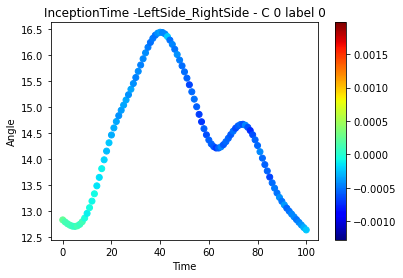

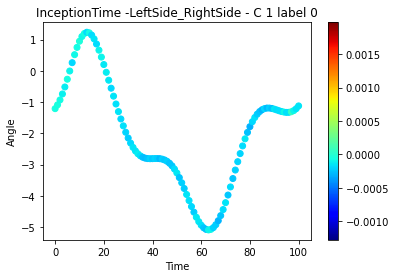

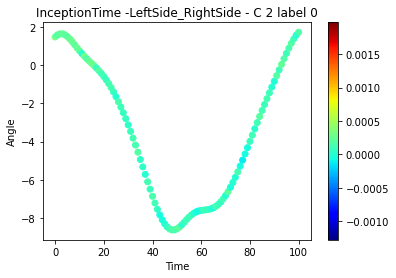

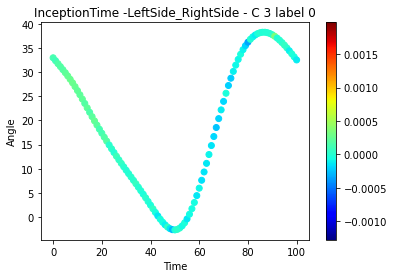

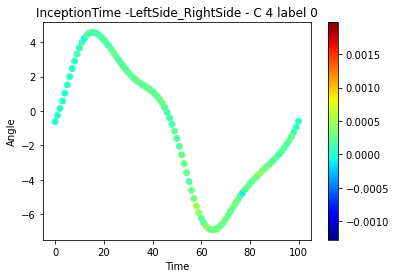

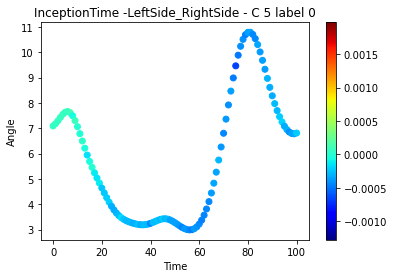

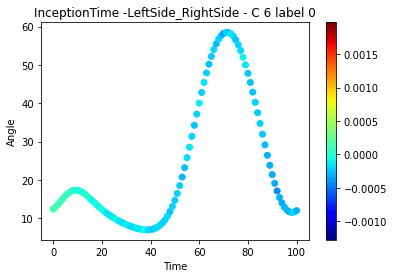

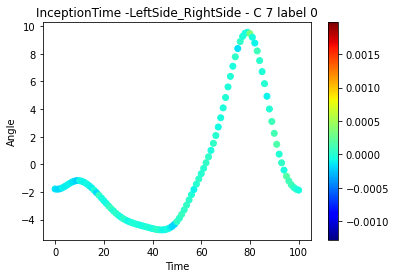

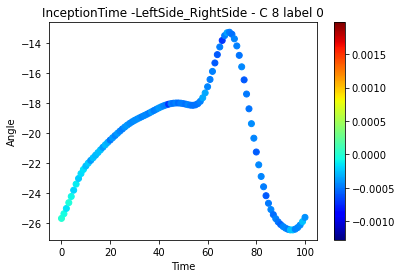

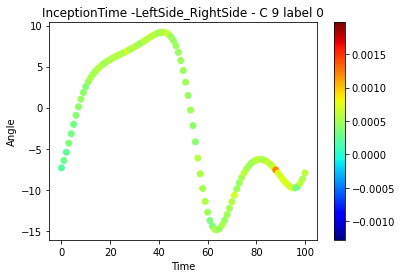

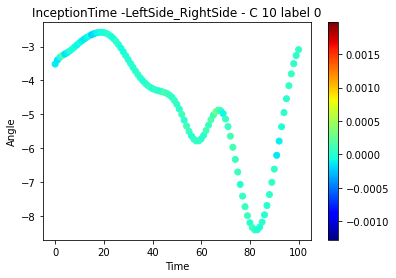

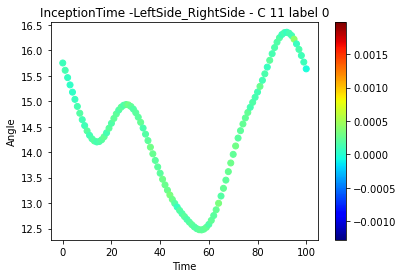

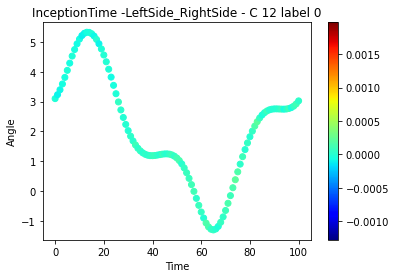

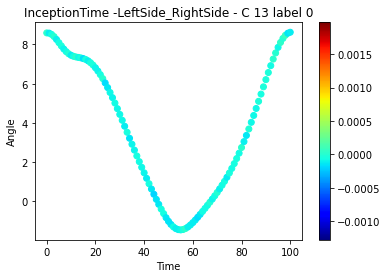

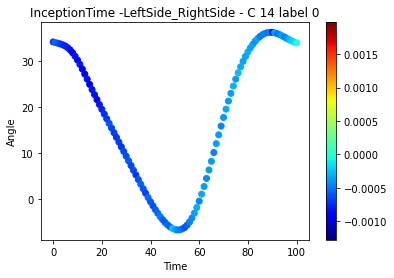

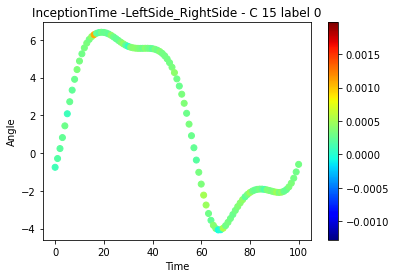

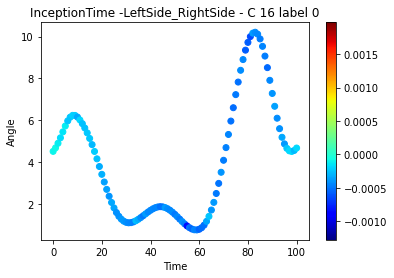

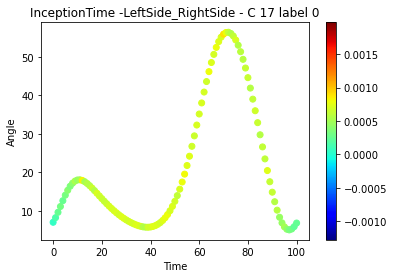

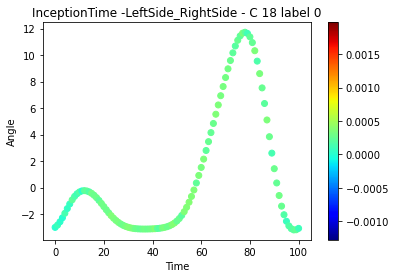

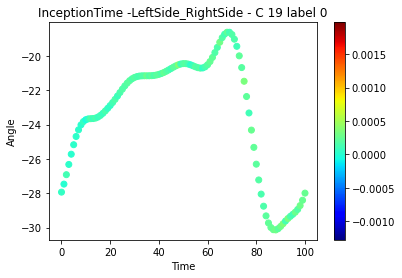

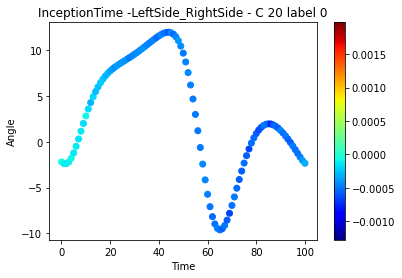

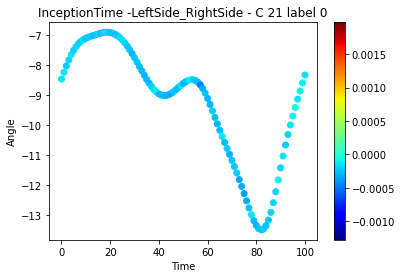

In [19]:
for i in range(22):

    plt.scatter(range(101),d_mean_label_zero[i],c=r_mean_label_zero[i],cmap='jet')
    plt.colorbar()
    
    
    plt.ylabel('Angle')
    plt.xlabel('Time')
    plt.title('InceptionTime -LeftSide_RightSide - C '+str(i)+' label 0')
    plt.clim(lim_min, lim_max)
#     plt.savefig('LRP_fig_LeftSide_RightSide/label_zero/Channel-range-label-zero-'+str(i))
    plt.show()

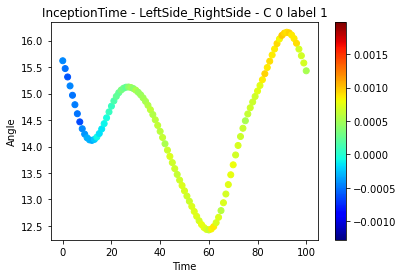

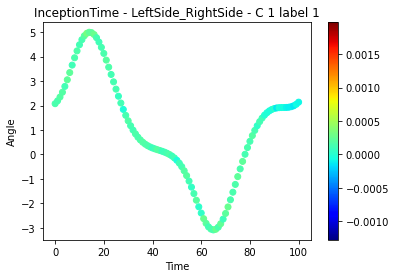

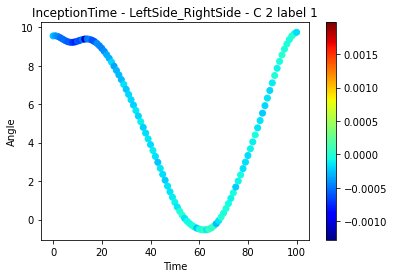

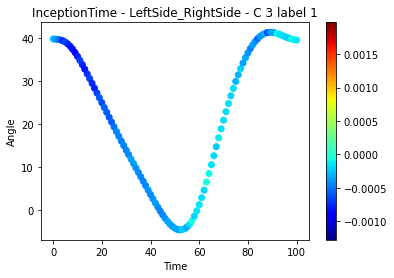

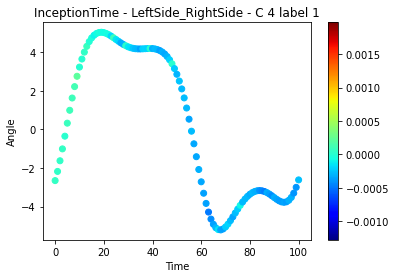

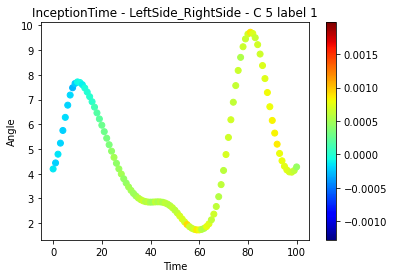

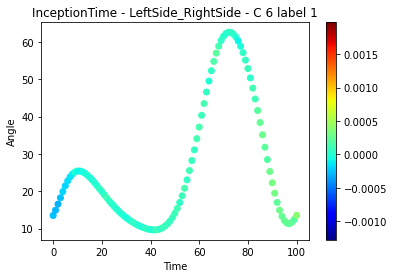

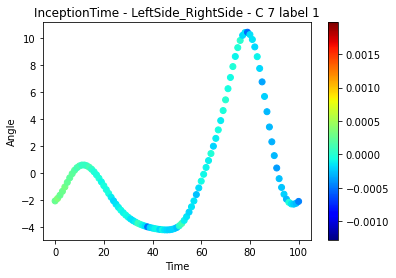

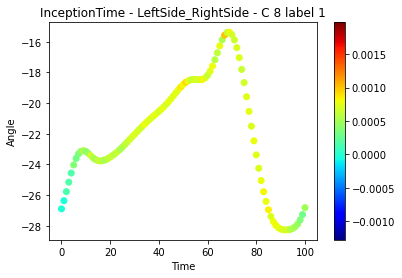

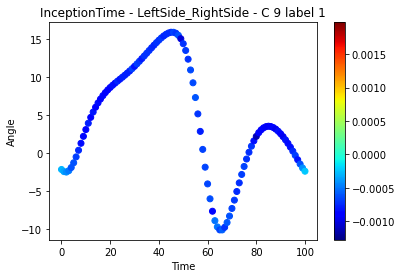

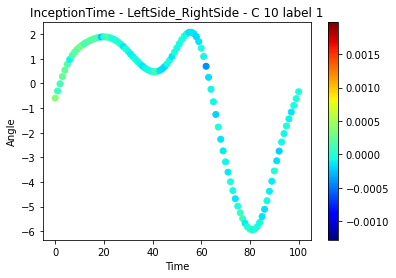

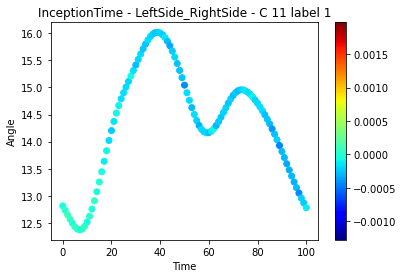

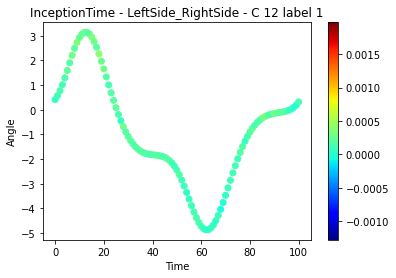

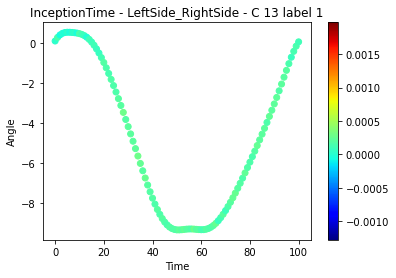

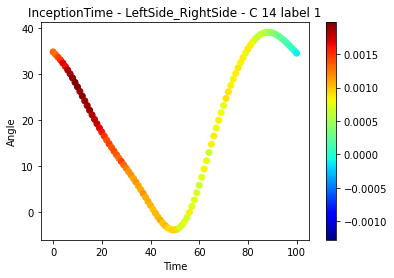

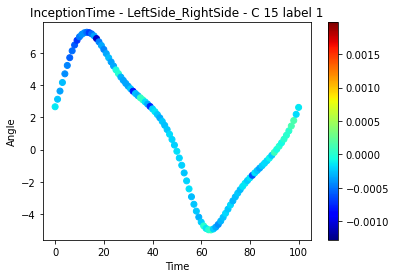

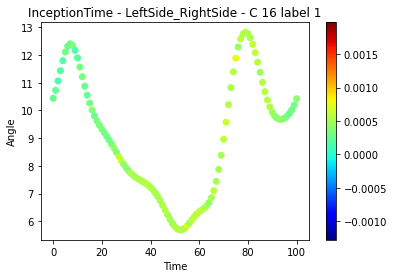

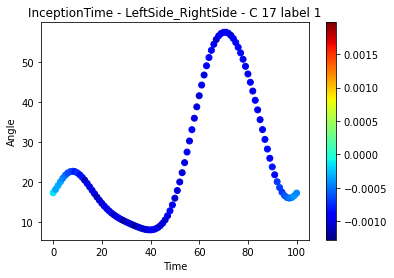

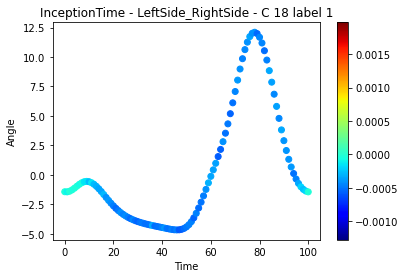

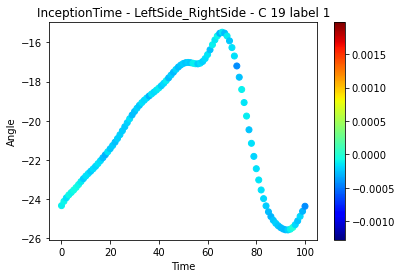

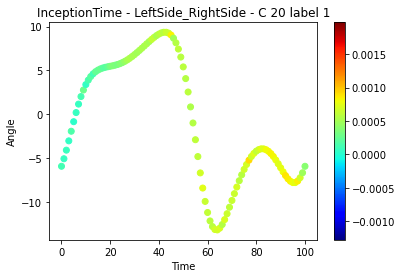

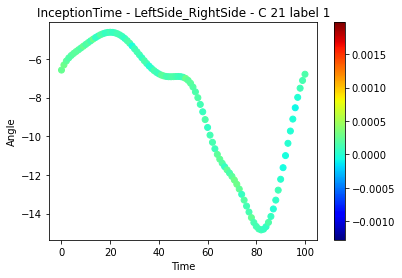

In [20]:
for i in range(22):

    plt.scatter(range(101),d_mean_label_one[i],c=r_mean_label_one[i],cmap='jet')
    plt.colorbar()
    
    
    plt.ylabel('Angle')
    plt.xlabel('Time')
    plt.title('InceptionTime - LeftSide_RightSide - C '+str(i)+' label 1')
    plt.clim(lim_min, lim_max)
#     plt.savefig('LRP_fig_LeftSide_RightSide/label_one/Channel-range-label-one-'+str(i))
    plt.show()